In [1]:
%reset -f

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np

from collections import Counter

from time import time

In [3]:
# this function returns the factorial of an integer passed to it
def factorial(n):
    if n<=1:
        return 1
    else:
        return n*factorial(n-1)

<font size=4>
<b>Binomial Distribution:</b>
<br>
Probability distribution that describes the outcome of <i><b>n</b></i> <u>identical</u> Bernoulli trials each with a probability of success <i><b>p</b></i>
<br><br>
<i>
<b>Example:</b>
<br>
Suppose I take a test of 10 multiple choice problems each with 5 answer options (and only one option is correct), what is the probability that I will get exactly 4 questions right just by guessing ?
</i>
</font>

## Binomial Distribution:
#### Probability distribution that describes the outcome of **n** *identical* Bernoulli trials each with a probability of success p

## *Example:*
#### *Suppose I take a test of 10 multiple choice problems each with 5 answer options (and only one option is correct), what is the probability that I will get exactly 4 questions right just by guessing ?*

In [4]:
# number of Binomial tests to run (where each test consists of "n" Bernoulli trials)
numSamples = 1000000

# number of Bernoulli trials "n" (i.e. the 10 problems)
trials_per_sample = 10

# target number of successful guesses
numSuccesses = 4

# probability of success at each guess
numOptions = 5
numCorrectAnswers = 1
p = numCorrectAnswers/numOptions
print(p)

0.2


In [5]:
# this function returns the number of successes for each Binomial test
def run_sample(trials_per_sample):
    numSuccess = 0
    theChoices = range(numOptions)
    for i in range(trials_per_sample):
        thisAnswer = np.random.choice(theChoices) # the correct answer to the current problem
        thisGuess = np.random.choice(theChoices) # my guess for the current problem
        if thisAnswer == thisGuess: # if my guess is correct...SUCCESS !!!
            numSuccess += 1
    return numSuccess

In [6]:
startTime = time()

# this list holds the results (where each result is the number of successes in each Binomial test)
result = []

# run several Binomial tests and save the results
for i in range(numSamples):
    result.append(run_sample(trials_per_sample))

endTime = time()

print('Duration:', round(endTime-startTime, 2), 'seconds')

Duration: 317.19 seconds


In [7]:
print('PROBABILITY OF ' + str(numSuccesses) + ' CORRECT GUESSES:')

# probability obtained from the sampling
n = trials_per_sample
k = numSuccesses
print('\tSampled Probability (' + str(numSamples) + ' experiments):', round(sum([i==k for i in result])/numSamples, 4))

# calculate the theoretical probability (using the binomial PDF)
n = trials_per_sample
k = numSuccesses
theoretical_Prob = (p**k)*((1-p)**(n-k))*factorial(n)/(factorial(k)*factorial(n-k))
print('\tTheoretical Probability (from binomial PDF):', round(theoretical_Prob, 4))

PROBABILITY OF 4 CORRECT GUESSES:
	Sampled Probability (1000000 experiments): 0.0879
	Theoretical Probability (from binomial PDF): 0.0881


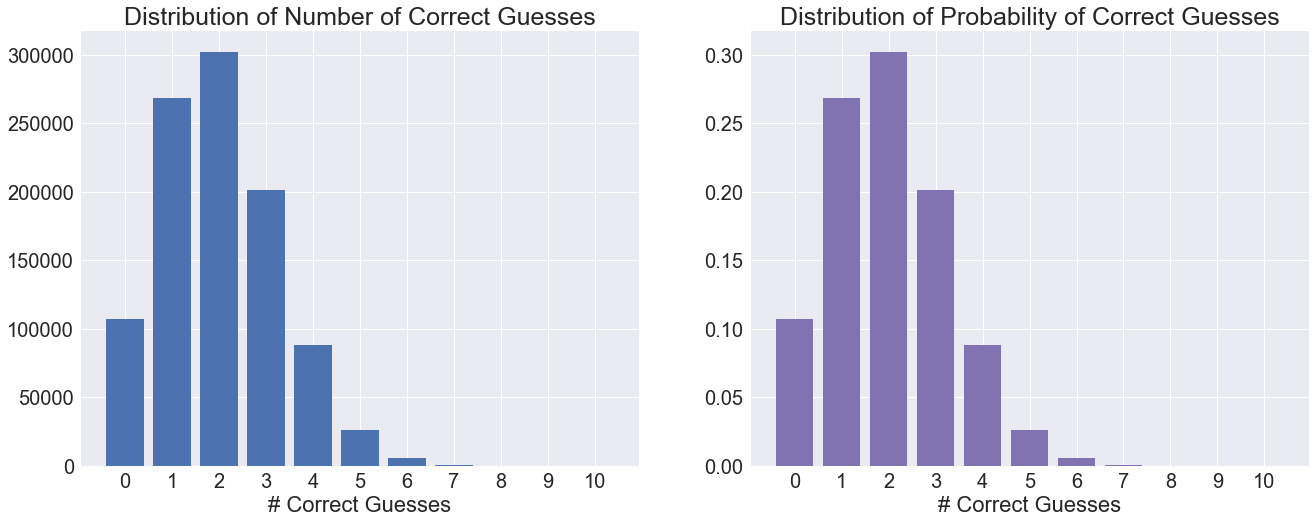

In [8]:
rr = Counter(result)
possibleSuccesses = range(11) # number of possible correct guesses (ranges from 0 for no-correct-guesses to 10 for all-correct-guesses)

xx = [(i, rr[i]) for i in possibleSuccesses]

px = [i[0] for i in xx]
py = [i[1] for i in xx]
pz = [i[1]/numSamples for i in xx]


plt.figure(figsize=[22,8])

# plot the distribution the number of correct guesses
plt.subplot(1,2,1)
plt.bar(px, py, color='C0')
plt.xticks(px, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('# Correct Guesses', fontsize=22)
plt.title('Distribution of Number of Correct Guesses', fontsize=25)

# plot the distribution the probability of correct guesses
plt.subplot(1,2,2)
plt.bar(px, pz, color='C3')
plt.xticks(px, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('# Correct Guesses', fontsize=22)
plt.title('Distribution of Probability of Correct Guesses', fontsize=25)

plt.show()

In [9]:
for i,j in zip(px,pz):
    print('Probability of guessing ' + str(i) + ' answers right:', round(j,6))

Probability of guessing 0 answers right: 0.107263
Probability of guessing 1 answers right: 0.268695
Probability of guessing 2 answers right: 0.302401
Probability of guessing 3 answers right: 0.201199
Probability of guessing 4 answers right: 0.087887
Probability of guessing 5 answers right: 0.026087
Probability of guessing 6 answers right: 0.00562
Probability of guessing 7 answers right: 0.000774
Probability of guessing 8 answers right: 6.9e-05
Probability of guessing 9 answers right: 5e-06
Probability of guessing 10 answers right: 0.0
